### **Classification of Waste Materials(recyclable , non-recyclable )using CNN Based on Transfer Learning**

### Name : surabhi chandrakant bhor


In [ ]:
# Install any additional dependencies if needed
#!pip install tensorflow opencv-python matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os


In [ ]:

train_path = "/content/drive/MyDrive/waste classification/TRAIN"
test_path = "/content/drive/MyDrive/waste classification/TEST"

In [ ]:
#!pip install tensorflow --upgrade


In [ ]:
from tensorflow.keras.utils import plot_model



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
from tqdm import tqdm

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 320/320 [00:11<00:00, 26.85it/s] 


In [ ]:
data.shape

(492, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 172, 'O': 320})

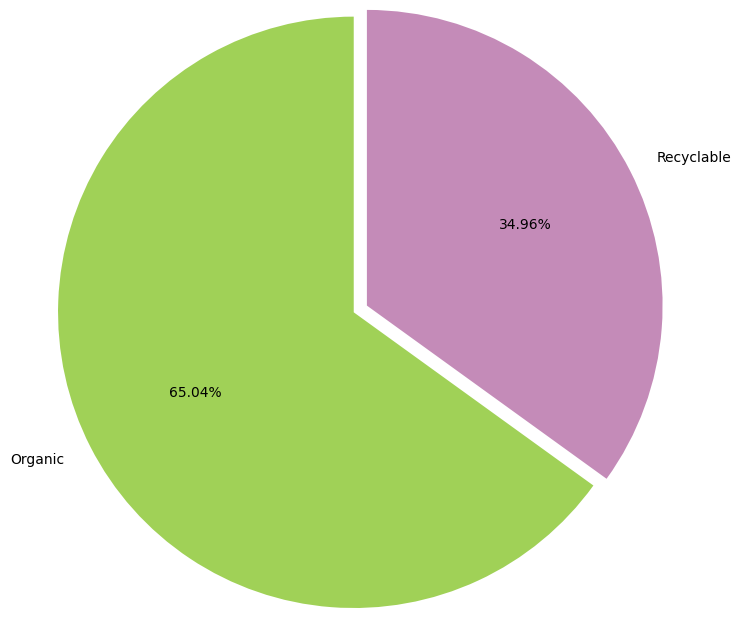

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

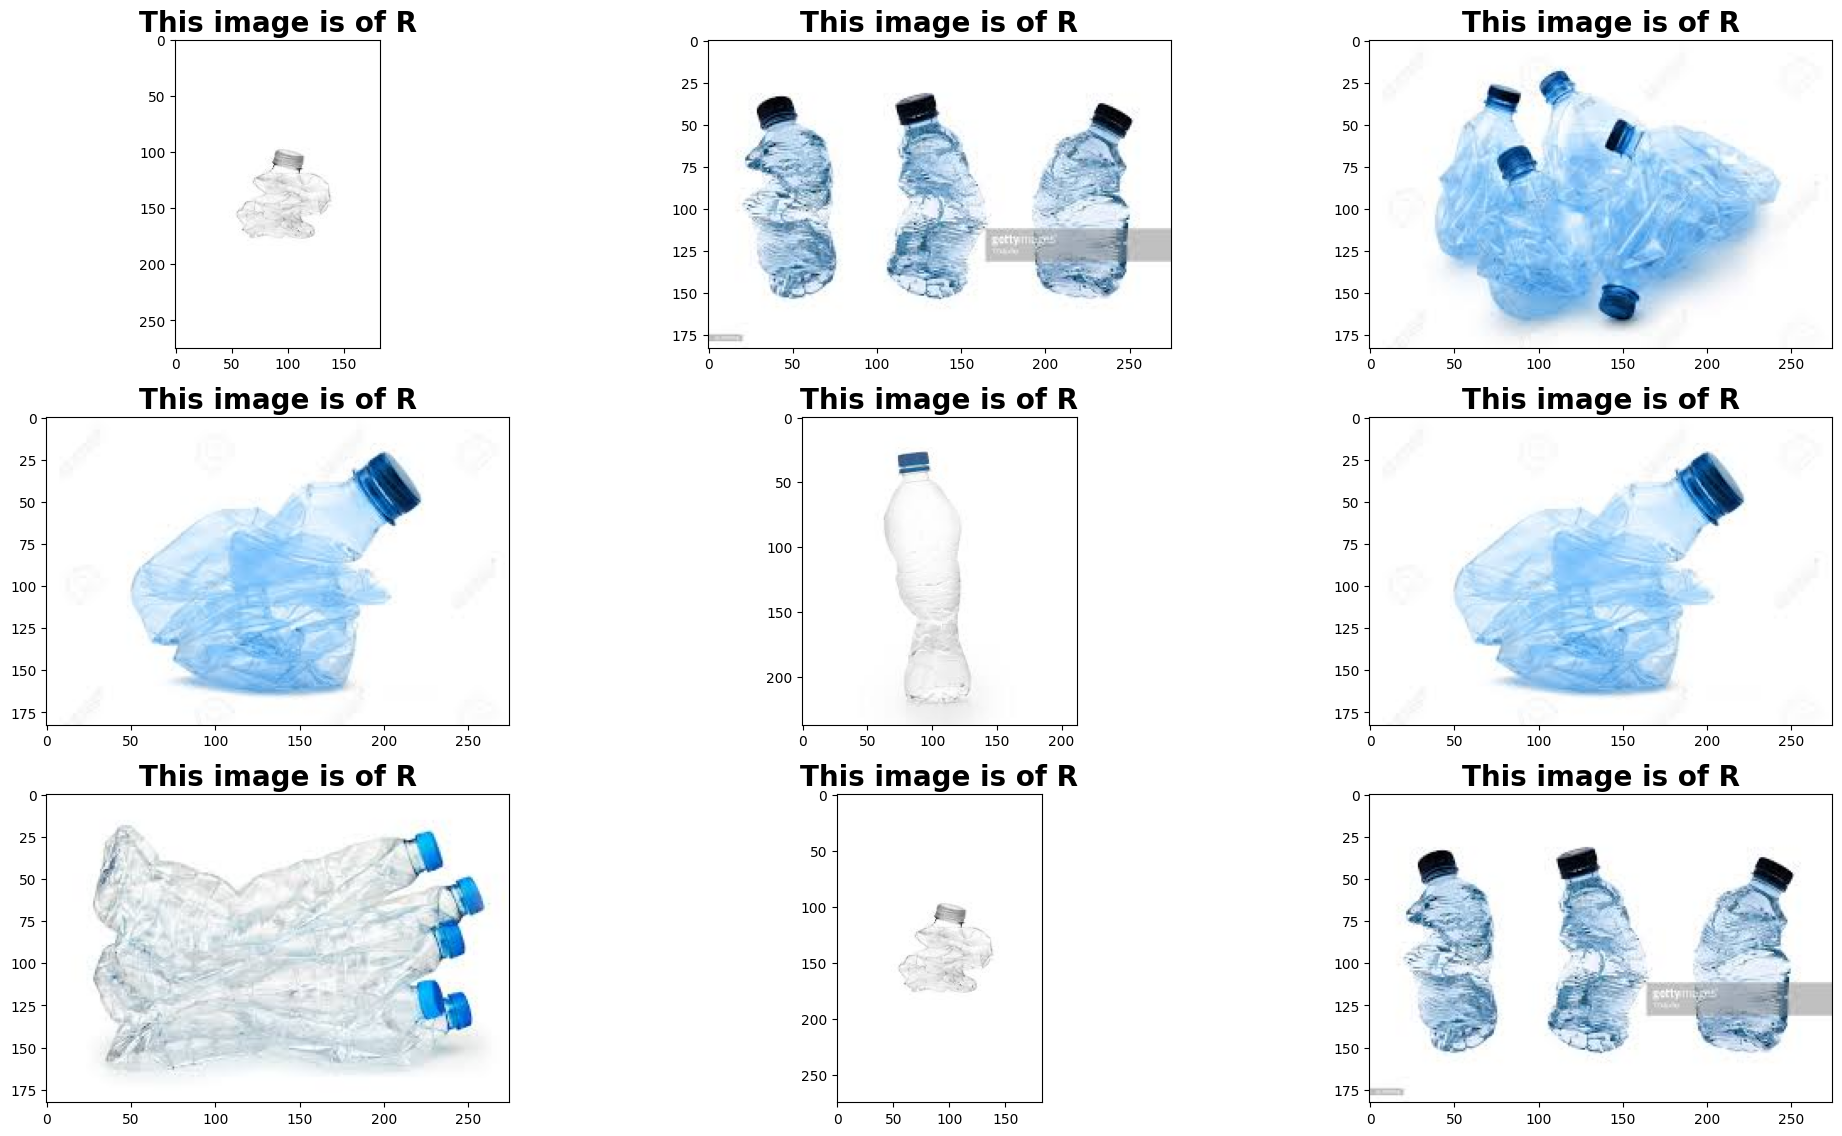

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(20)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


### CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

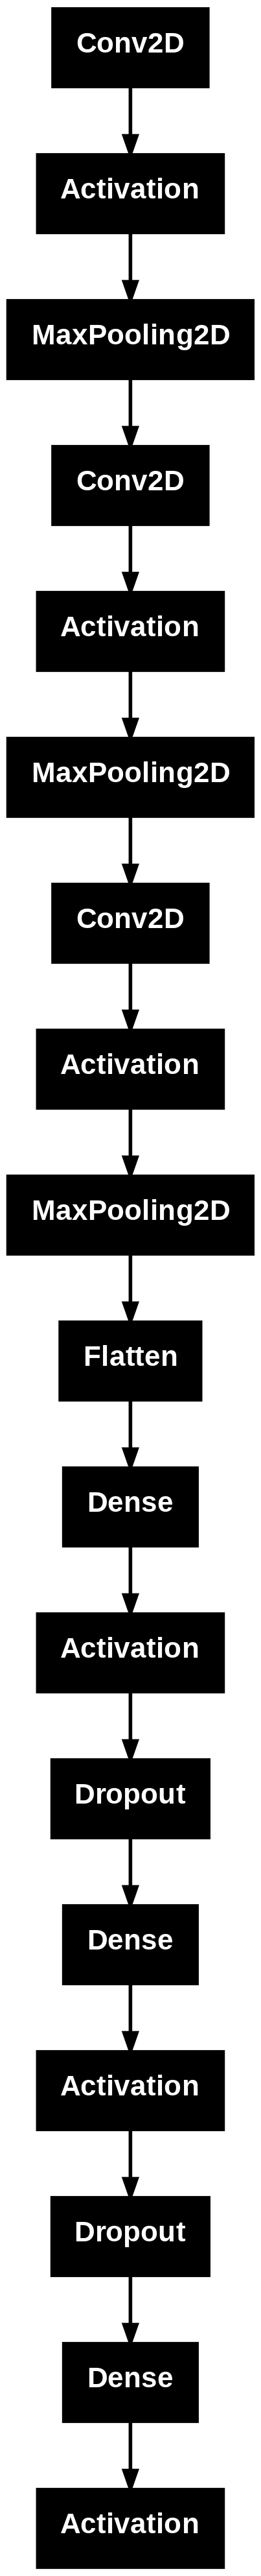

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 16,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 16,
        color_mode= "rgb",
        class_mode= "categorical")

Found 492 images belonging to 2 classes.
Found 225 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint

# Update the filepath to end with .keras
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Now use this callback in your model fitting
hist1 = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint]
)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.6585 - loss: 0.7759 - val_accuracy: 0.7956 - val_loss: 0.4808
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.8158 - loss: 0.4343 - val_accuracy: 0.8400 - val_loss: 0.5380
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.8702 - loss: 0.4053 - val_accuracy: 0.7378 - val_loss: 0.5985
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8463 - loss: 0.3633 - val_accuracy: 0.8178 - val_loss: 0.5552
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.8657 - loss: 0.3536 - val_accuracy: 0.8267 - val_loss: 0.5568
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9024 - loss: 0.3044 - val_accuracy: 0.7911 - val_loss: 0.6852
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9008 - loss: 0.2587 - val_accuracy: 0.8444 - val_loss: 0.8480
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8881 - loss: 0.2713 - val_accuracy: 0.8356

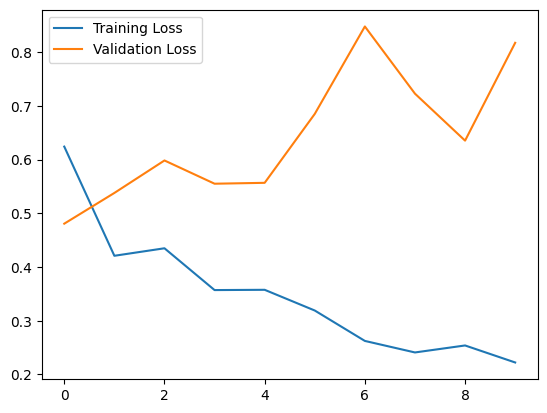

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['loss'], label='Training Loss')
plt.plot(hist1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
def predict_func(img):
    if img is not None: # Check if image loaded successfully
        plt.figure(figsize=(6,4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.tight_layout()
        img = cv2.resize(img, (224, 224))
        img = np.reshape(img, [-1, 224, 224,3])
        result = np.argmax(model.predict(img))
        if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
        elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")
    else:
        print("Image not loaded correctly")

In [ ]:
#pip install --upgrade opencv-python
#!pip install opencv-python
#import cv2 # imports the opencv-python module

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
This image -> Organic


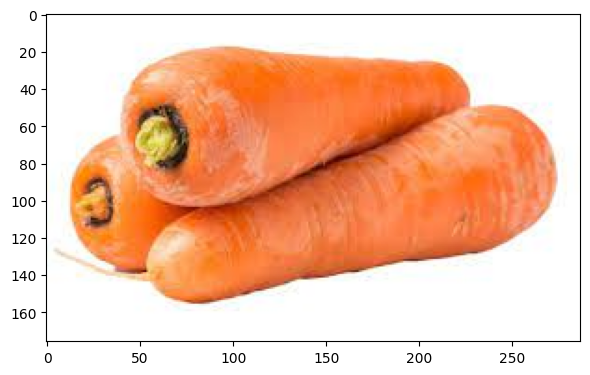

In [ ]:

test_img = cv2.imread("/content/drive/MyDrive/images/image1.jpeg")

predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This image -> Organic


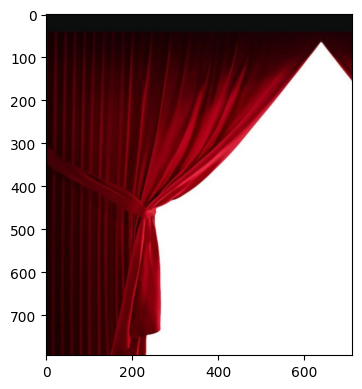

In [ ]:
test_img = cv2.imread("/content/drive/MyDrive/images/Screenshot 2024-10-02 100339.jpg")

predict_func(test_img)

In [ ]:
# Assuming your model is already defined and trained
accuracy = model.evaluate(test_generator)
print("Accuracy:", accuracy)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7766 - loss: 0.8617
Accuracy: [0.8175343871116638, 0.8088889122009277]


In [ ]:
 prediction = model.predict(test_generator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step


In [ ]:
preds = np.argmax(prediction, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming your model is already defined and trained
accuracy = model.evaluate(test_generator)
print("Accuracy:", accuracy)

prediction = model.predict(test_generator)
preds = np.argmax(prediction, axis=1)

# Use the confusion_matrix function from scikit-learn
cm = confusion_matrix(test_generator.classes, preds)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(test_generator.classes, preds))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8211 - loss: 0.7018
Accuracy: [0.817534327507019, 0.8088889122009277]
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Confusion Matrix:
[[131  22]
 [ 63   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       153
           1       0.29      0.12      0.17        72

    accuracy                           0.62       225
   macro avg       0.48      0.49      0.46       225
weighted avg       0.55      0.62      0.57       225



### CNN USING TRANSFER LEARNING

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model pre-trained on ImageNet, without the top fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16 to retain the pre-trained weights
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 as the base
model1 = Sequential()

# Add the VGG16 base model
model1.add(vgg_base)

# Add new fully connected layers for custom classification
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

# Output layer for binary classification (1 output with sigmoid)
model1.add(Dense(1, activation='sigmoid'))

# Compile the model for binary classification
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Data augmentation for training
train_datagen1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Validation data generator (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Example: Loading data from directories (assuming directory structure)
train_generator1 = train_datagen1.flow_from_directory(
    "/content/drive/MyDrive/waste classification/TRAIN",
    target_size=(224, 224),
    batch_size= 32,
    class_mode='binary')  # Use 'binary' mode for binary classification

validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/waste classification/TEST",
    target_size=(224, 224),
    batch_size= 32,
    class_mode='binary')  # Use 'binary' mode for binary classification

# Training the model
history1 = model1.fit(
    train_generator1,
    steps_per_epoch=train_generator1.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Save the model
model.save('cnn_transfer_learning_model_binary.h5')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 492 images belonging to 2 classes.
Found 225 images belonging to 2 classes.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - accuracy: 0.4688 - loss: 0.8218 - val_accuracy: 0.6711 - val_loss: 0.6300
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6875 - loss: 0.5720 - val_accuracy: 0.6800 - val_loss: 0.6167
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5938 - loss: 0.8352 - val_accuracy: 0.6800 - val_loss: 0.6036
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5938 - loss: 0.7805 - val_accuracy: 0.6800 - val_loss: 0.5869
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7812 - loss: 0.4942 - val_accuracy: 0.6978 - val_loss: 0.5791
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.7150 - val_accuracy: 0.7244 - val_loss: 0.5745
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5938 - loss: 0.6584 - val_accuracy: 0.7289 - val_loss: 0.5708
Epoc

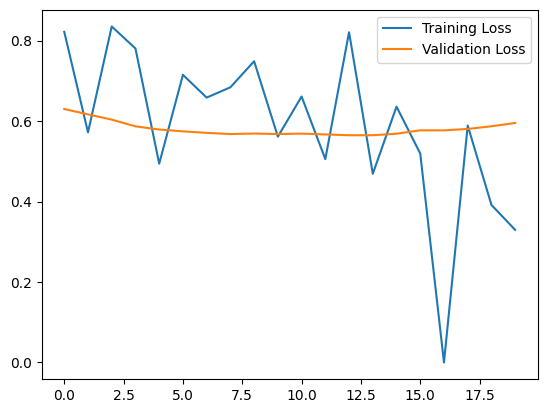

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], label='Training Loss') # Changed hist to history1
plt.plot(history1.history['val_loss'], label='Validation Loss') # Changed hist to history1
plt.legend()
plt.show()


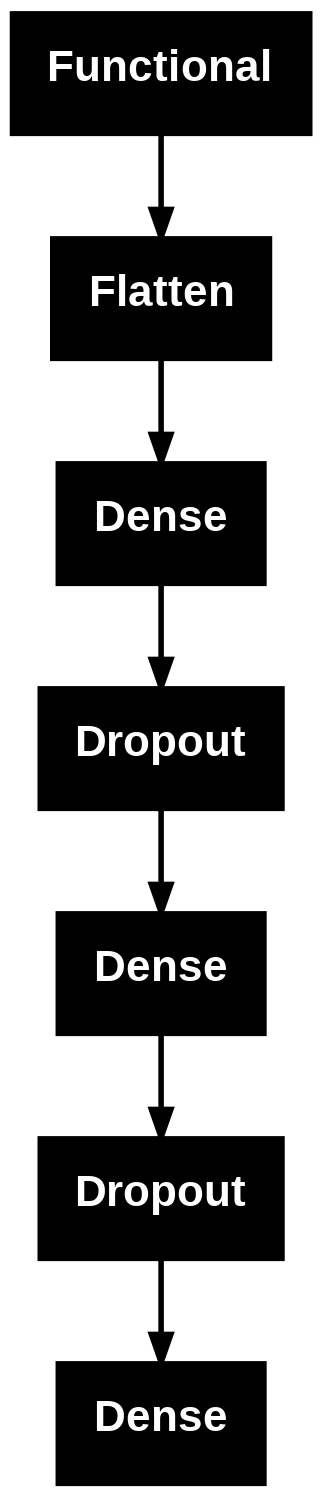

In [ ]:
plot_model(model1)

In [ ]:
# Assuming your model is already defined and trained
accuracy = model1.evaluate(validation_generator)
print("Accuracy:", accuracy)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6743 - loss: 0.5822
Accuracy: [0.5952861309051514, 0.6755555272102356]


In [ ]:
def predict_func(img):
    if img is not None: # Check if image loaded successfully
        plt.figure(figsize=(6,4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.tight_layout()
        img = cv2.resize(img, (224, 224))
        img = np.reshape(img, [-1, 224, 224,3])
        result = np.argmax(model1.predict(img))
        if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
        elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")
    else:
        print("Image not loaded correctly")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
This image -> Recyclable


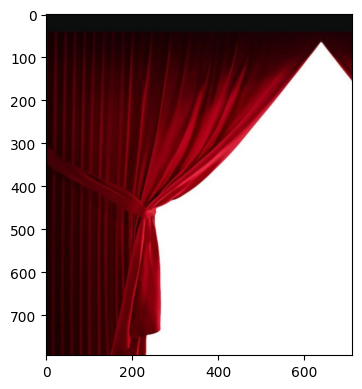

In [ ]:

test_img = cv2.imread("/content/drive/MyDrive/images/Screenshot 2024-10-02 100339.jpg")

predict_func(test_img)